In [1]:
# from __future__ import print_function, division

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [61]:
# TODO define gaussian function here
def gaussian(x_values, amplitude, mean, spread):
    X = 0.5*np.square((x-mean)/spread)
    return amplitude*np.exp(-X)

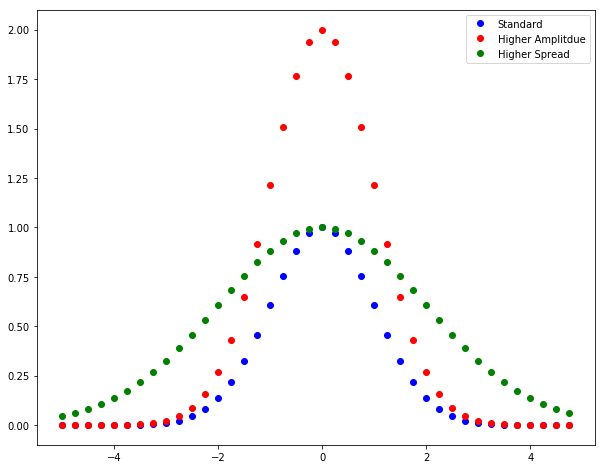

In [65]:
# TODO plot gaussians here
x = np.arange(-5,5,0.25)
y = gaussian(x,1,0,1)
y1 = gaussian(x,2,0,1)
y2 = gaussian(x,1,0,2)

plt.figure(figsize=(10,8))
plt.plot(x,y,'bo',label="Standard")
plt.plot(x,y1,'ro',label="Higher Amplitdue")
plt.plot(x,y2,'go',label="Higher Spread")

plt.legend()
plt.show()

0.999999999872473 1.7206092032173857e-09 1.0000000001670553


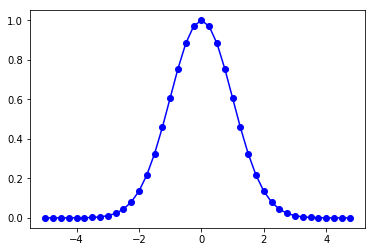

In [66]:
# TODO fit gaussians, with known parameters, here
from scipy import optimize
params, cov = optimize.curve_fit(gaussian,x,y)

# TODO plot result
plt.plot(x,y,'bo')
plt.plot(x,gaussian(x, *params),'b-')

print(*params)


In [67]:
# TODO: load data here
x,y = np.loadtxt("HDalpha_data", unpack=True)

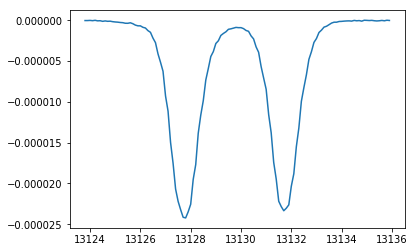

In [68]:
# TODO: plot it
plt.plot(x,y)

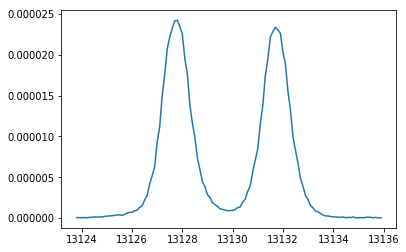

In [69]:
# TODO: plot data as emission signal
y_emission = -y
plt.plot(x,y_emission)

2.4219261086471896e-05 13127.755621557517 0.5562669047465476 2.329513282723455e-05 13131.728197694416 0.5449906281316932


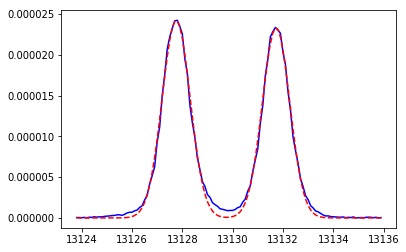

In [71]:
# TODO: fit a function to this data and plot it

def double_gaussian(x, amplitude_1, mean_1, spread_1, amplitude_2, mean_2, spread_2):
    return gaussian(x,amplitude_1,mean_1,spread_1) + gaussian(x,amplitude_2,mean_2,spread_2)

params, cov = optimize.curve_fit(double_gaussian,x,y_emission, [0.000025,13128,0.1,0.000025,13132,0.1])
plt.plot(x, y_emission,'b-', x, double_gaussian(x,*params), 'r--')
print(*params)

# Part 2

In [38]:
# Generate 100 random samples normally distriuted
x = np.random.rand(100)
y = np.random.rand(100)

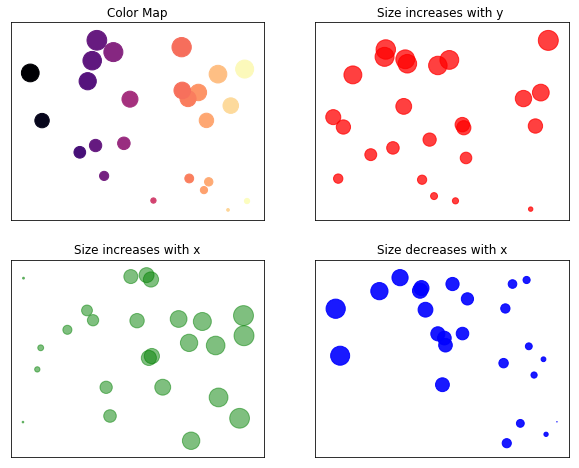

In [51]:
# Create subplots
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.xticks([])
plt.yticks([])
plt.title("Color Map")
colors = (x[:25])*100
size = 400*(y[:25])
plt.scatter(x[:25], y[:25], c = colors, alpha = 1.00, s = size, cmap = 'magma')

plt.subplot(2,2,2)
plt.xticks([])
plt.yticks([])
plt.title("Size increases with y ")
size = 400*y[25:50]
plt.scatter(x[25:50], y[25:50], color = "red", alpha = 0.75, s = size)

plt.subplot(2,2,3)
plt.xticks([])
plt.yticks([])
plt.title("Size increases with x")
size = 400*x[50:75]
plt.scatter(x[50:75], y[50:75], color = "green", alpha = 0.50, s = size)

plt.subplot(2,2,4)
plt.xticks([])
plt.yticks([])
plt.title("Size decreases with x")
size = 400*(1-x[75:100])
plt.scatter(x[75:100], y[75:100], color = "blue", alpha = 0.90, s = size)

In [52]:
plt.savefig("lab6-part2.pdf")

<Figure size 432x288 with 0 Axes>

# Part 3

In [112]:
def flux_for_dipole(x_pos, y_pos, Q_vals, X, Y):
    """
    Returns the flux based on the information of the charges
    and the grid of the plot.
    Code modified from Physics 113, written by Blas Cabrera
    """
    flux = np.zeros((len(X), len(Y)));
    x_m = np.outer(np.ones((X.size)), X); 
    y_m = np.outer(Y, np.ones((Y.size))); 
    for n in range(len(Q_vals)):
        flux += 2*np.pi*Q_vals[n]*(1 - (x_pos[n]-x_m)/np.sqrt((y_pos[n]-y_m)**2+(x_pos[n]-x_m)**2))
    return flux

In [124]:
# TODO create arrays of information
x = np.array([-5,5])
y = np.array([0,0])
Q = np.array([-1,1])
X = np.arange(-31.5,31.5,0.5)
Y = np.arange(-31.5,31.5,0.5)

In [125]:
# TODO get flux
flux = flux_for_dipole(x,y,Q,X,Y)

/home/jonathan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


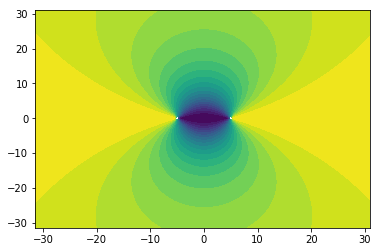

In [127]:
# TODO plot contours of the flux
xx, yy = np.meshgrid(X,Y)
plt.contourf(xx,yy,flux,20)